In [1]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import pandas as pd
import csv

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
train_raw = pd.read_csv("dataset/train.csv")

test_raw  = pd.read_csv('dataset/test.csv')


#to play with our data we'll create a copy
#remember python assignment or equal passes by reference vs values, so we use the copy function: https://stackoverflow.com/questions/46327494/python-pandas-dataframe-copydeep-false-vs-copydeep-true-vs
train_data = train_raw.copy(deep = True)

#preview data
print (train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      26048 non-null  int64  
 1   name            26048 non-null  object 
 2   street          26048 non-null  object 
 3   type            26048 non-null  object 
 4   model           24768 non-null  object 
 5   market_segment  26048 non-null  object 
 6   type_of_area    26048 non-null  object 
 7   bedrooms        25644 non-null  object 
 8   bathrooms       24812 non-null  float64
 9   district        26048 non-null  int64  
 10  region          26048 non-null  object 
 11  planning_area   26048 non-null  object 
 12  subszone        26048 non-null  object 
 13  lat             26048 non-null  float64
 14  lng             26048 non-null  float64
 15  tenure          25761 non-null  object 
 16  built_year      16005 non-null  float64
 17  no_of_units     25006 non-null 

In [3]:
def check_missing_values(df):
    print("Stats for missing values:")
    print("-"*15)
    for col in df:
        print(f"{col}: ", df[col].isna().sum())
check_missing_values(train_data)
check_missing_values(test_raw)

Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  1280
market_segment:  0
type_of_area:  0
bedrooms:  404
bathrooms:  1236
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  287
built_year:  10043
no_of_units:  1042
area_size:  2
eco_category:  0
accessibility:  0
date_listed:  0
price:  0
Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  388
market_segment:  0
type_of_area:  0
bedrooms:  118
bathrooms:  337
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  85
built_year:  2875
no_of_units:  326
area_size:  0
eco_category:  0
accessibility:  0
date_listed:  0


Training set missing values counts:
model, bedrooms, bathrooms, tenure, built_year**, no_of_units, area_size

Testing set missing values:
model, bedrooms, bathrooms, tenure, built_year, no_of_units

In [4]:
train_data.describe(include = 'all')

,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
count,2.604800e+04,26048,26048,26048,24768,26048,26048,25644,24812.000000,26048.000000,...,26048.000000,26048.000000,25761,16005.000000,25006.000000,26046.000000,26048,26048,26048,2.604800e+04
unique,NaN,1650,3442,2,14,1,1,17,NaN,NaN,...,NaN,NaN,53,NaN,NaN,NaN,1,1,359,NaN
top,NaN,marina one residences,23 marina way,apartment,apartment,ocr,strata,3,NaN,NaN,...,NaN,NaN,leasehold/99 years,NaN,NaN,NaN,uncategorized,guarded,2021-10-12,NaN
freq,NaN,668,274,13958,13306,26048,26048,7306,NaN,NaN,...,NaN,NaN,15300,NaN,NaN,NaN,26048,26048,1728,NaN
mean,5.495573e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.278091,12.211609,...,1.321145,103.846138,NaN,2010.926398,462.350636,1248.902096,NaN,NaN,NaN,2.994669e+06
std,2.608064e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.147204,7.020134,...,0.038569,0.049865,NaN,11.915875,423.476259,1066.102020,NaN,NaN,NaN,4.324294e+06
min,1.000122e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,...,1.239337,103.696215,NaN,1799.000000,1.000000,226.000000,NaN,NaN,NaN,5.566000e+05
25%,3.229224e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,...,1.296472,103.820262,NaN,2010.000000,130.000000,678.000000,NaN,NaN,NaN,1.331000e+06
50%,5.486808e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,11.000000,...,1.313384,103.843081,NaN,2014.000000,366.000000,958.000000,NaN,NaN,NaN,1.851800e+06
75%,7.764926e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,18.000000,...,1.341210,103.879673,NaN,2016.000000,646.000000,1356.000000,NaN,NaN,NaN,2.948000e+06


# 1. De-duplication

In [5]:
train_data.nunique()

listing_id        26048
name               1650
street             3442
type                  2
model                14
market_segment        1
type_of_area          1
bedrooms             17
bathrooms             9
district             27
region                5
planning_area        38
subszone            193
lat                3118
lng                3118
tenure               53
built_year           60
no_of_units         526
area_size          1178
eco_category          1
accessibility         1
date_listed         359
price              4704
dtype: int64

## 1.1 Drop unnecessary columns

Since the duplicated values are the same across train and test datasets, we can safely discard them.

In [7]:
train_data.drop(columns=["market_segment", "type_of_area", "eco_category", "accessibility"], inplace=True)
train_data.head()

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,3,4.0,4,central region,southern islands,sentosa,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,3,3.0,11,central region,novena,moulmein,1.319533,103.847030,freehold,1999.0,24.0,1259.0,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,4,3.0,11,central region,novena,moulmein,1.315656,103.844445,freehold,2012.0,235.0,1959.0,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,3,2.0,14,east region,bedok,kaki bukit,1.329367,103.905791,freehold,NaN,237.0,883.0,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,3,3.0,15,east region,bedok,frankel,1.309176,103.911352,freehold,NaN,36.0,1066.0,2021-12-24,2262700.0


## 1.2 Drop duplicate rows
Although it may seem that this contains no duplicates (all listing id are unique), we need to check whether their attributes are the same too.

An assumption made here is that:
* if all attributes (except listing_id) are the same, they are duplicate records
* if prices are different, they are unique records

Reason for removing 1) records:
* it may affect our metrics, making us believe that our models are performing well
* it is very unlikely for 1) to be unique records, thus they do not come from a real distribution

In [8]:
train_data.drop(columns=["listing_id", "price"]).duplicated().sum()

1098

In [9]:
# count records with duplicated everything
train_data.drop(columns=["listing_id"]).duplicated().sum()

326

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     26048 non-null  int64  
 1   name           26048 non-null  object 
 2   street         26048 non-null  object 
 3   type           26048 non-null  object 
 4   model          24768 non-null  object 
 5   bedrooms       25644 non-null  object 
 6   bathrooms      24812 non-null  float64
 7   district       26048 non-null  int64  
 8   region         26048 non-null  object 
 9   planning_area  26048 non-null  object 
 10  subszone       26048 non-null  object 
 11  lat            26048 non-null  float64
 12  lng            26048 non-null  float64
 13  tenure         25761 non-null  object 
 14  built_year     16005 non-null  float64
 15  no_of_units    25006 non-null  float64
 16  area_size      26046 non-null  float64
 17  date_listed    26048 non-null  object 
 18  price 

In [11]:
def drop_complete_duplicates(df):
    attribute_columns = ['name', 'street', 'type', 'model', 'bedrooms', 'bathrooms', 'district',
       'region', 'planning_area', 'subszone', 'lat', 'lng', 'tenure',
       'built_year', 'no_of_units', 'area_size', 'date_listed', 'price']
    return df.drop_duplicates(subset=attribute_columns)
train_data = drop_complete_duplicates(train_data)

In [12]:
train_data.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'bedrooms',
       'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat',
       'lng', 'tenure', 'built_year', 'no_of_units', 'area_size',
       'date_listed', 'price'],
      dtype='object')

In [13]:
train_data.shape

(25722, 19)

# 2. Make up missing values

## 2.0 convert to their suitable datatypes

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing_id     25722 non-null  int64  
 1   name           25722 non-null  object 
 2   street         25722 non-null  object 
 3   type           25722 non-null  object 
 4   model          24445 non-null  object 
 5   bedrooms       25325 non-null  object 
 6   bathrooms      24488 non-null  float64
 7   district       25722 non-null  int64  
 8   region         25722 non-null  object 
 9   planning_area  25722 non-null  object 
 10  subszone       25722 non-null  object 
 11  lat            25722 non-null  float64
 12  lng            25722 non-null  float64
 13  tenure         25437 non-null  object 
 14  built_year     15794 non-null  float64
 15  no_of_units    24684 non-null  float64
 16  area_size      25720 non-null  float64
 17  date_listed    25722 non-null  object 
 18  price 

In [17]:
def convert_correct_dtypes(df):
    df["date_listed"] = pd.to_datetime(df["date_listed"])
    return df.astype({"listing_id":int,
                      "name": str,
                      "street": str,
                      "type": str,
                      "model":str,
                      "bedrooms": str,
                      "bathrooms":int,
                      "district": int,
                      "region": str,
                      "planning_area": str,
                      "subszone": str,
                      "tenure": str,
                      "built_year": int,
                      "no_of_units": int,
                      "area_size": float,
                      }, errors='ignore')
dedup_data = convert_correct_dtypes(train_data)

In [18]:
dedup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     25722 non-null  int64         
 1   name           25722 non-null  object        
 2   street         25722 non-null  object        
 3   type           25722 non-null  object        
 4   model          25722 non-null  object        
 5   bedrooms       25722 non-null  object        
 6   bathrooms      24488 non-null  float64       
 7   district       25722 non-null  int64         
 8   region         25722 non-null  object        
 9   planning_area  25722 non-null  object        
 10  subszone       25722 non-null  object        
 11  lat            25722 non-null  float64       
 12  lng            25722 non-null  float64       
 13  tenure         25722 non-null  object        
 14  built_year     15794 non-null  float64       
 15  no_of_units    2468

## 2.1 Make up for missing values

Some string attributes implicitly contain NaN values

In [19]:
check_missing_values(dedup_data)

Stats for missing values:
---------------
listing_id:  0
name:  0
street:  0
type:  0
model:  0
bedrooms:  0
bathrooms:  1234
district:  0
region:  0
planning_area:  0
subszone:  0
lat:  0
lng:  0
tenure:  0
built_year:  9928
no_of_units:  1038
area_size:  2
date_listed:  0
price:  0


## Histogram for numerical variables

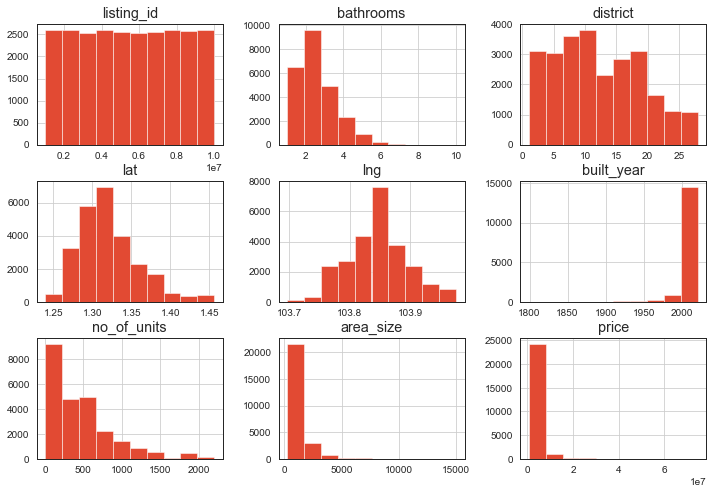

In [179]:
all_attributes = dedup_data.columns
hist = dedup_data.hist()

## Histogram for categorical variables

In [199]:
discrete_attributes = ["name", "street", "type", "model", "bedrooms", "region",
                       "planning_area", "subszone", "tenure"]
for attr in discrete_attributes:
    unique_vars = list(dedup_data[attr].unique())
    print(attr)
    for v in unique_vars:
        if 'nan' in v.lower():
            print(' '*3, v)
    # count = dedup_data.groupby(attr).count().reset_index()


    # count.head
    # break
    # count.plot.bar(x=attr, y="value")
    # plt.show()

name
    onan suites
street
    onan road
type
model
    nan
bedrooms
    nan
region
planning_area
subszone
    yunnan
tenure
    nan


As such, some attributes contain implecit NaN values

这里应该继续统计哪些含有nan的string，然后再把它们算在真的NaN里面去，最后再做数据补全

# TODO:
is this long-tail effect or outlier?

In [115]:
missing_built_year_props = set(dedup_data[dedup_data.built_year.isna()]['name'].unique())
print(len(missing_built_year_props))
too_old_props =  set(dedup_data[dedup_data.built_year<1965]['name'].unique())
print(len(too_old_props))

313
71


In [116]:
missing_built_year_props

{'10 evelyn',
 '120 grange',
 '1208 upper boon keng road',
 '15 holland hill',
 '19 nassim',
 '33 residences',
 '35 gilstead',
 '39 flower road',
 '77 @ east coast',
 'affinity at serangoon',
 'alexandra road',
 'almond avenue',
 'amber 45',
 'amber gardens',
 'amber park',
 'amber sea',
 'anchorvale link',
 'ang mo kio avenue 2',
 'arena residences',
 'arthur road',
 'avenue south residence',
 'balestier road',
 'balmoral park',
 'balmoral road',
 'bartley vue',
 'beach road',
 'belgravia drive',
 'bencoolen house',
 'boulevard 88',
 'broadrick road',
 'brookvale drive',
 'buangkok crescent',
 'bukit timah road',
 'cairnhill 16',
 'cairnhill road',
 'canberra street',
 'canberra walk',
 'canninghill piers',
 'carpmael thirty-eight',
 'casa al mare',
 'cashew road',
 'chancery lane',
 'changi road',
 'chestnut crescent',
 'choa chu kang avenue 4',
 'chwee chian view',
 'clarke quay',
 'clavon',
 'coastline residences',
 'compassvale bow',
 'compassvale road',
 'cuscaden reserve',
 'dai

In [117]:
suspicious_props = missing_built_year_props.union(too_old_props)

In [118]:
len(suspicious_props)

316

The set of properties with long built history largely overlap with the properties with a missing value.

In [119]:
real_old_properties = too_old_props - missing_built_year_props.intersection(too_old_props)
print(real_old_properties)

{'tiong bahru estate', 'emerald hill road', 'watermark robertson quay'}


tiong bahru estate was built in the 1930s, and emerald hill road was built in 1901.
But watermark robertson quay was built in 2008

In [125]:
dedup_data.loc[dedup_data.name=='watermark robertson quay']["built_year"]

8675     2008.0
20622    2008.0
Name: built_year, dtype: float64

In [134]:
with open("property_to_correct.csv", 'w+') as f:
    l = list(suspicious_props)
    # writer = csv.writer(f)
    for p in l:
        f.write(p+"\n")

In [124]:
dedup_data.loc[dedup_data.name=='watermark robertson quay', "built_year"]=2008

## 2.1 By filling up with known complete records

In [135]:
dedup_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25722 entries, 0 to 26047
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     25722 non-null  int64         
 1   name           25722 non-null  object        
 2   street         25722 non-null  object        
 3   type           25722 non-null  object        
 4   model          25722 non-null  object        
 5   bedrooms       25722 non-null  object        
 6   bathrooms      24488 non-null  float64       
 7   district       25722 non-null  int64         
 8   region         25722 non-null  object        
 9   planning_area  25722 non-null  object        
 10  subszone       25722 non-null  object        
 11  lat            25722 non-null  float64       
 12  lng            25722 non-null  float64       
 13  tenure         25722 non-null  object        
 14  built_year     15794 non-null  float64       
 15  no_of_units    2468

In [136]:
dedup_data.isnull().sum()

listing_id          0
name                0
street              0
type                0
model               0
bedrooms            0
bathrooms        1234
district            0
region              0
planning_area       0
subszone            0
lat                 0
lng                 0
tenure              0
built_year       9928
no_of_units      1038
area_size           2
date_listed         0
price               0
dtype: int64

## Analysis of the missing values
* area_size: a little tricky, it depends on the # of bedrooms and bathrooms, but can be inferred from the dataset
* bedrooms: can look up from the table
* built_year: some are incorrect, some are unfinished projects thus having no built_year
* no. of units: can look up from the table

In [137]:
dedup_data[dedup_data.area_size.isna()]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
2415,4426068,guillemard road,guillemard road,condominium,nan,4,NaN,14,central region,geylang,aljunied,1.30879,103.876948,nan,NaN,NaN,NaN,2022-01-02,1320000.0
12891,8670725,the scotts tower,38 scotts road,condominium,condominium,2,2.0,9,central region,newton,cairnhill,1.30999,103.835500,leasehold/103 years,2016.0,231.0,NaN,2021-10-17,2475000.0


In [143]:
def correct_area_size(df):
    df.loc[(df["name"]=="guillemard road") and (df.area_size==np.nan), "area_size"] = 922.0 # 810 for 2b3b plus 2x (549-495)
    df.loc[df.name=="the scotts tower" and df.area_size==np.nan, "area_size"]= 807.0
    return df
dedup_data = correct_area_size(dedup_data)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [150]:
dedup_data.loc[dedup_data.area_size.isna()]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
2415,4426068,guillemard road,guillemard road,condominium,nan,4,NaN,14,central region,geylang,aljunied,1.30879,103.876948,nan,NaN,NaN,NaN,2022-01-02,1320000.0
12891,8670725,the scotts tower,38 scotts road,condominium,condominium,2,2.0,9,central region,newton,cairnhill,1.30999,103.835500,leasehold/103 years,2016.0,231.0,NaN,2021-10-17,2475000.0


In [ ]:
nan_columns = ["bathrooms", "built_year", "no_of_units"]

In [30]:
attribute_lookup_table = train_data.drop(columns=["listing_id", "price"]).drop_duplicates()
attribute_lookup_table.shape

(24950, 17)

In [47]:
def fill_by_lookup(origin_df, attr_to_fill):
    # look up by comparing to all other attributes
    attr_to_compare = set(origin_df.columns)
    attr_to_compare = attr_to_compare - {"listing_id", "price", attr_to_fill}

    attr_to_compare = set("name")
    lookup_table = origin_df[origin_df[attr_to_fill].notnull()].drop_duplicates()
    similar_addresses = (
        origin_df.merge(lookup_table, how='left', on="name", suffixes=['', '_new'])[attr_to_fill+"_new"]
    )
    origin_df[attr_to_fill] = origin_df[attr_to_fill].combine_first(similar_addresses)
    return origin_df

In [88]:
dedup_data[dedup_data["built_year"].isna()].head

<bound method NDFrame.head of        listing_id                          name                    street  \
3         3071445               urban treasures          205 jalan eunos    
4         9667539          infini at east coast           east coast road   
5         5203525  the watergardens at canberra            canberra drive   
6         6668762                       midwood             hillview rise   
7         6273506     sengkang grand residences           compassvale bow   
...           ...                           ...                       ...   
26032     9446077            provence residence     37 canberra crescent    
26037     7139386                   arthur road               arthur road   
26039     2980771         affinity at serangoon  serangoon north avenue 1   
26040     6487359      the woodleigh residences       bidadari park drive   
26044     3161844                   dalvey haus          101 dalvey road    

              type                  model bed

In [70]:
attr_to_compare = set(dedup_data.columns)
attr_to_fill="built_year"
attr_to_compare = attr_to_compare - {"listing_id", "price", attr_to_fill}
attr_to_compare

{'area_size',
 'bathrooms',
 'bedrooms',
 'date_listed',
 'district',
 'lat',
 'lng',
 'model',
 'name',
 'no_of_units',
 'planning_area',
 'region',
 'street',
 'subszone',
 'tenure',
 'type'}

In [73]:
lookup_table = dedup_data[dedup_data[attr_to_fill].notnull()].drop_duplicates(subset=attr_to_compare)

In [80]:
lookup_table.shape

(15513, 19)

In [48]:
dedup_data = fill_by_lookup(dedup_data, "built_year")

In [77]:
similar_addresses = (
        dedup_data.merge(lookup_table, how='left', on=attr_to_compare, suffixes=['', '_new'])[attr_to_fill+"_new"]
    )
# origin_df[attr_to_fill] = origin_df[attr_to_fill].combine_first(similar_addresses)

KeyError: {'tenure', 'model', 'no_of_units', 'date_listed', 'district', 'lat', 'region', 'street', 'area_size', 'lng', 'bathrooms', 'planning_area', 'type', 'name', 'bedrooms', 'subszone'}

In [78]:
dedup_data.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'bedrooms',
       'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat',
       'lng', 'tenure', 'built_year', 'no_of_units', 'area_size',
       'date_listed', 'price'],
      dtype='object')

In [79]:
lookup_table.columns

Index(['listing_id', 'name', 'street', 'type', 'model', 'bedrooms',
       'bathrooms', 'district', 'region', 'planning_area', 'subszone', 'lat',
       'lng', 'tenure', 'built_year', 'no_of_units', 'area_size',
       'date_listed', 'price'],
      dtype='object')

In [61]:
dedup_data[dedup_data.name=="midwood"]

,listing_id,name,street,type,model,bedrooms,bathrooms,district,region,planning_area,subszone,lat,lng,tenure,built_year,no_of_units,area_size,date_listed,price
6,6668762,midwood,hillview rise,condominium,condominium,4,3.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2011.0,564.0,1249.0,2022-01-05,2189000.0
90,1769740,midwood,hillview rise,condominium,condominium,4,4.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2011.0,564.0,1259.0,2021-12-11,2090000.0
257,6360662,midwood,10 hillview rise,condominium,condominium,4+1,4.0,23,west region,bukit batok,hillview,1.364106,103.763671,leasehold/99 years,2014.0,564.0,1259.0,2021-12-29,2151600.0
335,8803866,midwood,hillview rise,condominium,condominium,3,2.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2014.0,564.0,893.0,2021-12-14,1596100.0
526,5270130,midwood,hillview rise,condominium,condominium,2,1.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2016.0,564.0,635.0,2021-12-08,1103300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,3536034,midwood,hillview rise,condominium,condominium,3,2.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2021.0,564.0,990.0,2021-12-23,1760000.0
25149,4475603,midwood,8 hillview rise,condominium,condominium,3,3.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2021.0,564.0,990.0,2021-12-29,1764400.0
25212,7756361,midwood,hillview rise,condominium,condominium,3,2.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2021.0,564.0,904.0,2022-01-01,1515800.0
25508,3985111,midwood,hillview rise,condominium,condominium,2,2.0,23,west region,bukit batok,hillview,1.362862,103.763434,leasehold/99 years,2017.0,564.0,689.0,2021-12-30,1214200.0


## 2.2 Convert to approprate data types